<a href="https://colab.research.google.com/github/jihaeyeon/2022_2-ORS-HW/blob/main/HW2_PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 8.5 MB/s 


In [2]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [3]:
fname_img = "L1C_T11SNA_A037204_20220806T184300.tif"

In [7]:
! gdown --id 1TFBNFHIw12_uk4A1rq6EtkndcTnJS7ci

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TFBNFHIw12_uk4A1rq6EtkndcTnJS7ci
To: /content/201804301CN0210003_subset_3000x3000.tif
100% 27.0M/27.0M [00:00<00:00, 105MB/s] 


In [9]:
os.path.isfile(fname_img)

True

In [10]:
img = rasterio.open(fname_img)

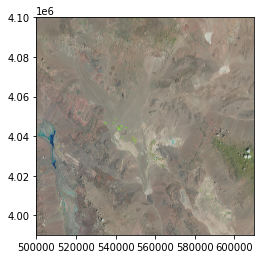

In [11]:
show(img)

In [12]:
type(img)

rasterio.io.DatasetReader

In [17]:
I = img.read()

In [18]:
I.shape

(3, 5490, 5490)

In [19]:
type(I)

numpy.ndarray

In [20]:
I = np.swapaxes(I, 0, 2)

In [21]:
I.shape

(5490, 5490, 3)

In [22]:
X = I.reshape((5490*5490, 3))

In [23]:
X.shape

(30140100, 3)

In [24]:
I[0,1, :]

array([133, 125, 114], dtype=uint8)

In [25]:
X[1, :]

array([133, 125, 114], dtype=uint8)

In [26]:
I[1, 0, :]

array([133, 125, 114], dtype=uint8)

In [27]:
X[5490, :]

array([133, 125, 114], dtype=uint8)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [29]:
print(pca.components_)

[[ 0.6381043   0.56757623  0.52026928]
 [-0.73658955  0.25325669  0.62713387]
 [-0.2241846   0.78340173 -0.5796749 ]]


In [31]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1, x1)

0.9999999999999996

In [32]:
np.dot(x1, x2)

0.0

In [33]:
print(pca.explained_variance_)

[760.38800821  40.9323951   15.99439291]


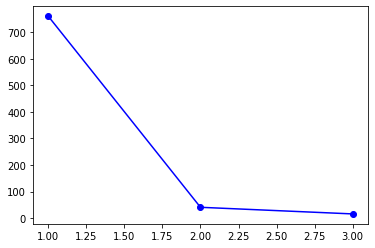

In [34]:
plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

In [35]:
X_pca = pca.transform(X)

In [37]:
X_pca.shape

(30140100, 3)

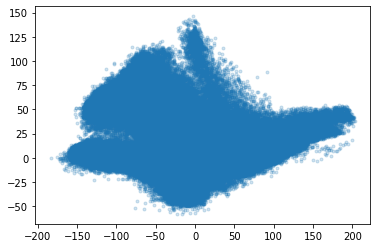

In [38]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', alpha=0.2)

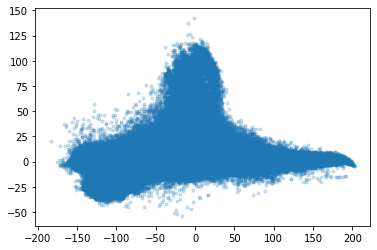

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', alpha=0.2)

In [40]:
I_pca = X_pca.reshape(5490, 5490, 3)

In [41]:
I_pca = np.swapaxes(I_pca, 0, 1)

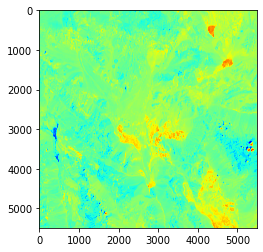

In [42]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

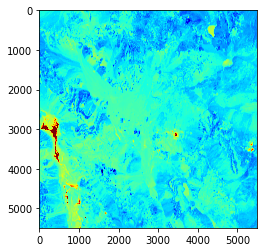

In [43]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

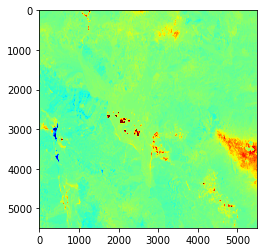

In [44]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

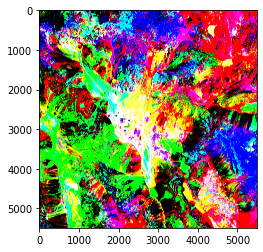

In [45]:
plt.imshow(I_pca)
plt.show()